<a href="https://colab.research.google.com/github/saharab290/Air-Quality-Prediction-Using-ML/blob/main/DS%26ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
# Method 3: Relative path (if file is in same directory as script)
df = pd.read_csv("air_pollution_data.csv")

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate percentage of non-null values for each column
percentages = (df.count() / len(df)) * 100

# Create bar chart
plt.figure(figsize=(12, 6))
bars = percentages.plot(kind='bar', color='skyblue', edgecolor='black')

# Add percentage labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom')

# Customize the plot
plt.title('Percentage of Non-Null Values per Column', fontsize=14, pad=20)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 110)  # Give some headroom for the labels
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

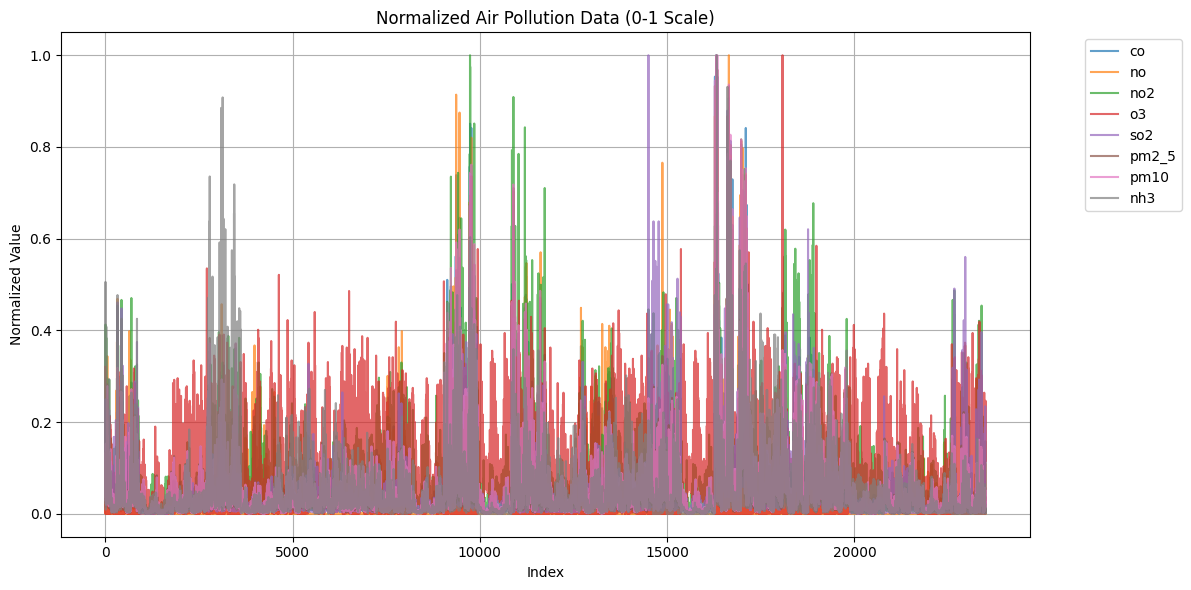


First 5 rows of normalized data:
        city        date  aqi        co        no       no2        o3  \
0  Ahmedabad  30-11-2020  1.0  0.015160  0.005199  0.048182  0.320427   
1  Ahmedabad  01-12-2020  1.0  0.065889  0.016843  0.164520  0.001797   
2  Ahmedabad  02-12-2020  1.0  0.071720  0.036132  0.147956  0.000418   
3  Ahmedabad  03-12-2020  1.0  0.092711  0.090812  0.120048  0.000000   
4  Ahmedabad  04-12-2020  1.0  0.088047  0.052254  0.176920  0.000049   

        so2     pm2_5      pm10       nh3  
0  0.107366  0.029713  0.029462  0.023708  
1  0.048630  0.054674  0.063392  0.077591  
2  0.053468  0.060357  0.070845  0.079746  
3  0.080417  0.068028  0.083000  0.103454  
4  0.063167  0.072758  0.084503  0.114940  

Normalized dataset saved as 'normalized_air_pollution_data.csv'


,city,date,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,Ahmedabad,30-11-2020,1.00,0.015160,0.005199,0.048182,0.320427,0.107366,0.029713,0.029462,0.023708
1,Ahmedabad,01-12-2020,1.00,0.065889,0.016843,0.164520,0.001797,0.048630,0.054674,0.063392,0.077591
2,Ahmedabad,02-12-2020,1.00,0.071720,0.036132,0.147956,0.000418,0.053468,0.060357,0.070845,0.079746
3,Ahmedabad,03-12-2020,1.00,0.092711,0.090812,0.120048,0.000000,0.080417,0.068028,0.083000,0.103454
4,Ahmedabad,04-12-2020,1.00,0.088047,0.052254,0.176920,0.000049,0.063167,0.072758,0.084503,0.114940
...,...,...,...,...,...,...,...,...,...,...,...
23499,Visakhapatnam,21-05-2023,0.50,0.007872,0.000000,0.005340,0.246486,0.008862,0.016809,0.019151,0.000227
23500,Visakhapatnam,22-05-2023,0.50,0.009038,0.000000,0.010439,0.204224,0.011033,0.014376,0.017648,0.004934
23501,Visakhapatnam,23-05-2023,0.50,0.009475,0.000000,0.011978,0.197184,0.011304,0.016119,0.019551,0.003403
23502,Visakhapatnam,24-05-2023,0.50,0.005539,0.000000,0.003168,0.235902,0.004567,0.013468,0.019893,0.000000


In [17]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset (replace with your actual data loading)
# df = pd.read_csv("your_dataset.csv")

# Normalization (0 to 1)
num_cols = df.select_dtypes(include=['number']).columns
scaler = MinMaxScaler()
df_normalized = df.copy()  # Create a copy to preserve original data
df_normalized[num_cols] = scaler.fit_transform(df[num_cols])

# Visualization
plt.figure(figsize=(12, 6))
for col in num_cols[1:11]:  # Plot first 5 numeric columns for clarity
    plt.plot(df_normalized[col], label=col, alpha=0.7)
plt.title('Normalized Air Pollution Data (0-1 Scale)')
plt.xlabel('Index')
plt.ylabel('Normalized Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Display first 5 rows of normalized data
print("\nFirst 5 rows of normalized data:")
print(df_normalized.head())

# Save normalized data to new CSV
df_normalized.to_csv('normalized_air_pollution_data.csv', index=False)
print("\nNormalized dataset saved as 'normalized_air_pollution_data.csv'")

# Return the normalized dataframe
df_normalized

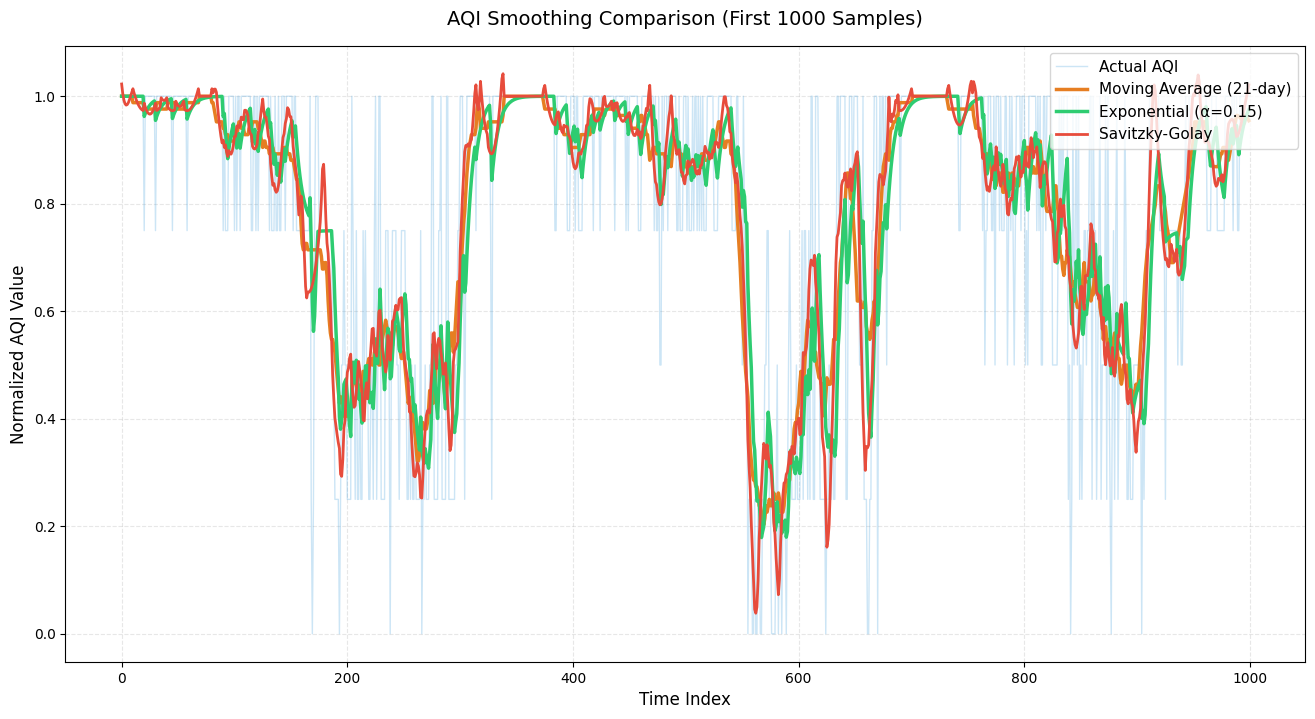

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Use first 1000 points
sample_size = 1000
df_sample = df_normalized.head(sample_size).copy()

# Smoothing parameters
window_size = 21  # Larger window for cleaner smoothing
alpha = 0.15      # Stronger smoothing factor

# Calculate smoothed versions
df_sample['Smoothed_MA'] = df_sample['aqi'].rolling(window=window_size, center=True, min_periods=1).mean()
df_sample['Smoothed_EWM'] = df_sample['aqi'].ewm(alpha=alpha, adjust=False).mean()
df_sample['Reconstructed_SG'] = savgol_filter(df_sample['aqi'],
                                           window_length=window_size,
                                           polyorder=3)

# Create figure
plt.figure(figsize=(16, 8))

# Plot settings
plt.plot(df_sample['aqi'], color='#3498db', alpha=0.25, linewidth=1, label='Actual AQI')
plt.plot(df_sample['Smoothed_MA'], color='#e67e22', linewidth=2.5, label=f'Moving Average ({window_size}-day)')
plt.plot(df_sample['Smoothed_EWM'], color='#2ecc71', linewidth=2.5, label=f'Exponential (α={alpha})')
plt.plot(df_sample['Reconstructed_SG'], color='#e74c3c', linewidth=2, label='Savitzky-Golay')

# Formatting
plt.title(f'AQI Smoothing Comparison (First {sample_size} Samples)', fontsize=14, pad=15)
plt.xlabel('Time Index', fontsize=12)
plt.ylabel('Normalized AQI Value', fontsize=12)
plt.legend(fontsize=11, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.3)


# Save sample data
df_sample.to_csv('aqi_smoothing_sample.csv', index=False)

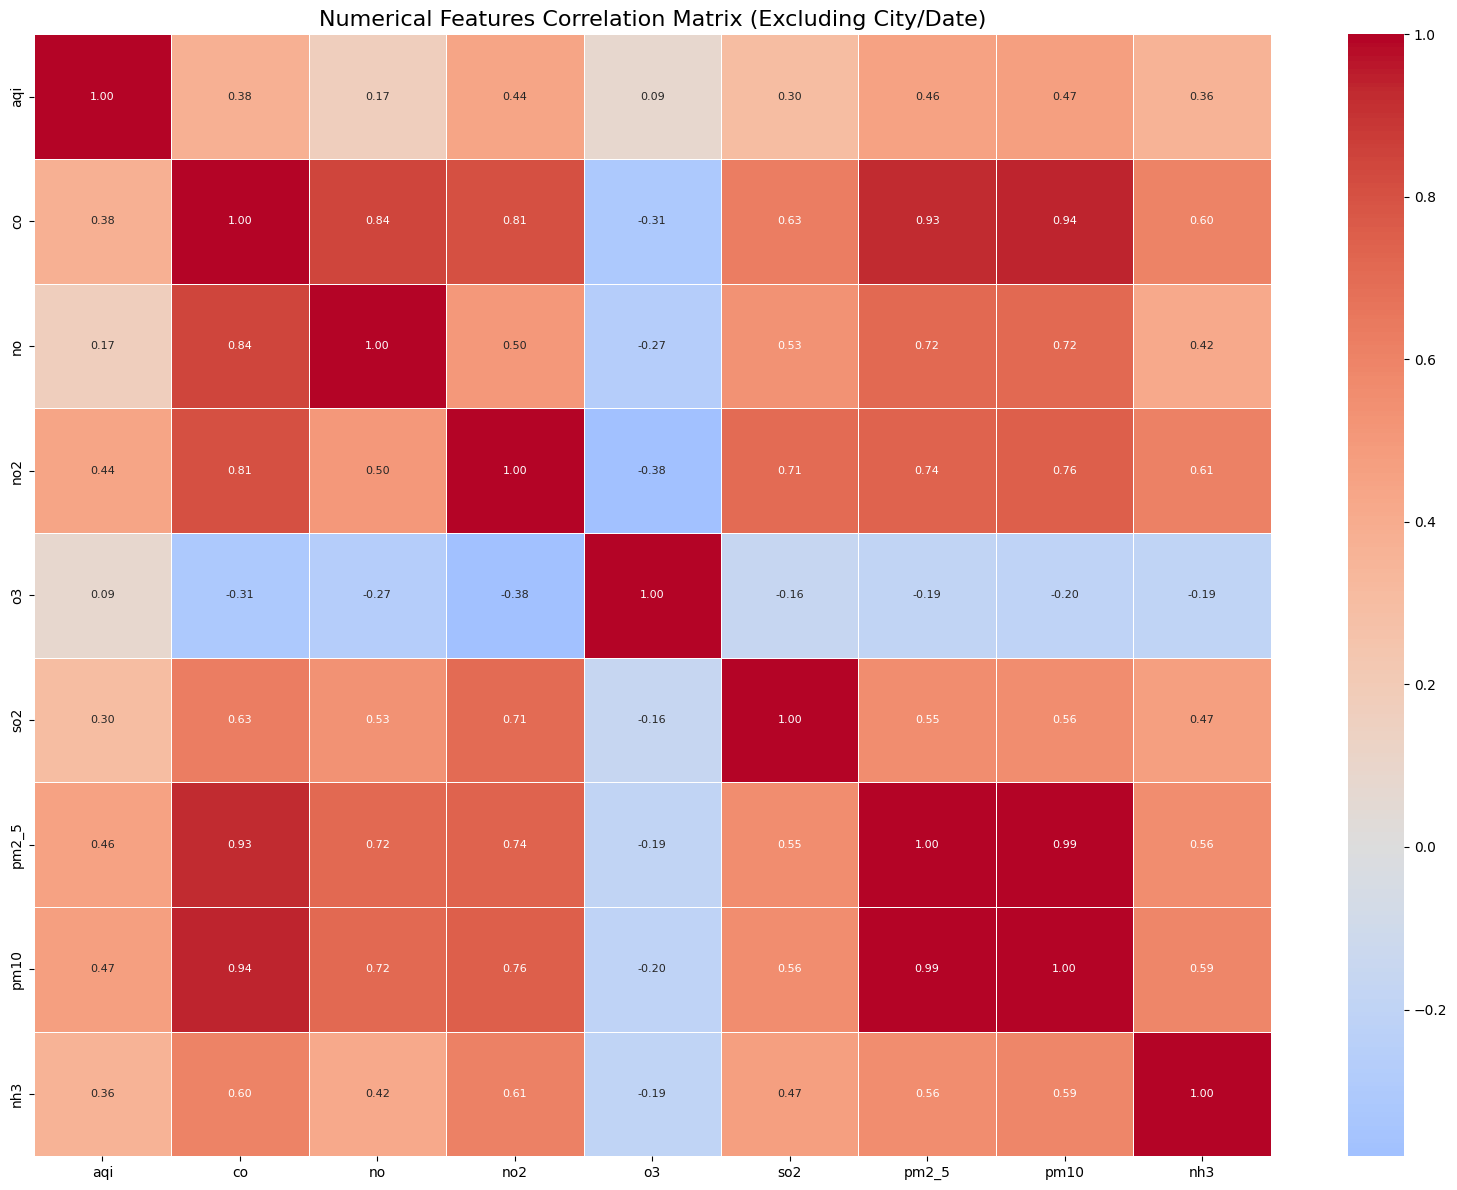

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numerical columns
numerical_cols = [col for col in df_normalized.columns
                 if col.lower() not in ['city', 'date'] and df_normalized[col].dtype in ['float64', 'int64']]

df_numerical = df_normalized[numerical_cols]

# Calculate correlation matrix
corr_matrix = df_numerical.corr()

# Visualize correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            center=0, linewidths=0.5, annot_kws={"size": 8})
plt.title('Numerical Features Correlation Matrix (Excluding City/Date)', fontsize=16)
plt.tight_layout()
plt.show()

In [20]:
# Set threshold for high correlation
threshold = 0.85

# Find highly correlated features
high_corr = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            high_corr.add(colname)

print(f"Highly correlated numerical features (threshold={threshold}):")
print(high_corr)

# Create reduced dataset (keeping city and date)
cols_to_keep = [col for col in df_normalized.columns if col not in high_corr]
df_reduced_corr = df_normalized[cols_to_keep]

print("\nRemaining features after reduction:")
print(df_reduced_corr.columns.tolist())

Highly correlated numerical features (threshold=0.85):
{'pm2_5', 'pm10'}

Remaining features after reduction:
['city', 'date', 'aqi', 'co', 'no', 'no2', 'o3', 'so2', 'nh3']


In [21]:
# Save reduced dataset (including city and date if they existed)
df_reduced_corr.to_csv('crr_reduced_data.csv', index=False)
print("\nFinal reduced dataset saved as 'crr_reduced_data.csv'")
print(f"Original features: {len(df_normalized.columns)}")
print(f"Reduced features: {len(df_reduced_corr.columns)}")


Final reduced dataset saved as 'crr_reduced_data.csv'
Original features: 11
Reduced features: 9


# SVM **MODEL**

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Load the dataset
data = pd.read_csv('crr_reduced_data.csv')

# Convert AQI to binary classification (good/bad)
# Assuming: good (0) = AQI ≤ 100, bad (1) = AQI > 100
data['air_quality'] = np.where(data['aqi'] <= 0.5, 0, 1)  # Since normalized 0-1, 0.5 represents 100 AQI

# Features and target
X = data[['co', 'no', 'no2', 'o3', 'so2', 'nh3']]
y = data['air_quality']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
# Initialize SVM classifier
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [27]:
# Predictions
y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1490  505]
 [ 293 4764]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.75      0.79      1995
           1       0.90      0.94      0.92      5057

    accuracy                           0.89      7052
   macro avg       0.87      0.84      0.86      7052
weighted avg       0.88      0.89      0.88      7052



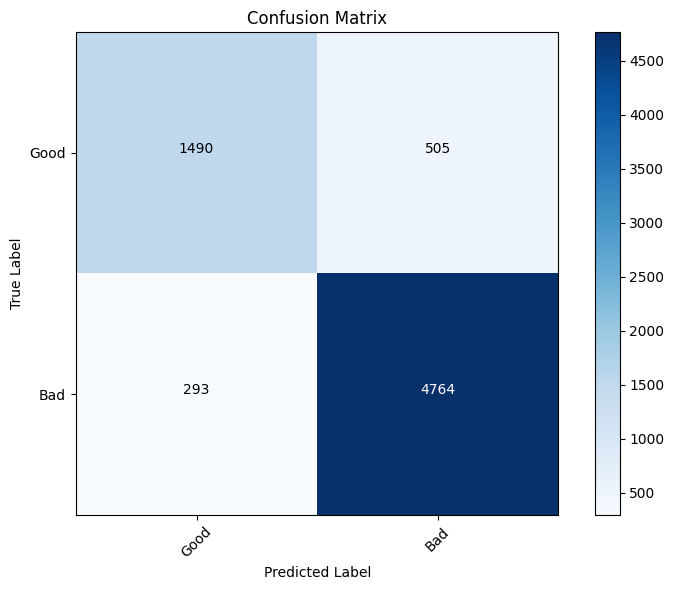

In [28]:
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Good', 'Bad'], rotation=45)
plt.yticks(tick_marks, ['Good', 'Bad'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

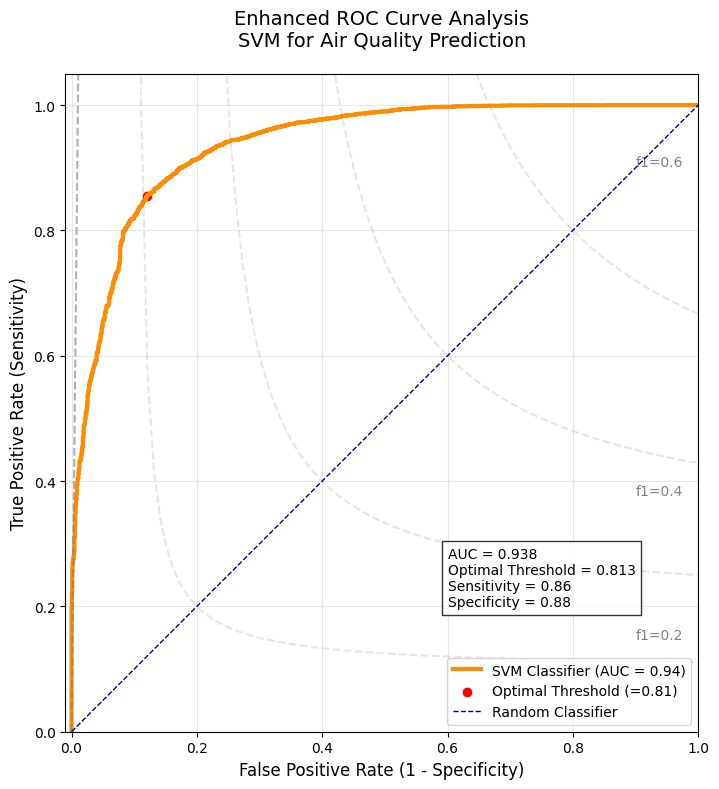

In [52]:
from sklearn.metrics import RocCurveDisplay

# Create enhanced ROC curve plot
plt.figure(figsize=(10, 8))

# Plot ROC curve with more details
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                             estimator_name='SVM Classifier')
roc_display.plot(ax=plt.gca(), color='darkorange', lw=3)

# Add important thresholds points
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red',
            label=f'Optimal Threshold (={optimal_threshold:.2f})')

# Add iso-f1 curves
x = np.linspace(0, 1, 100)
for f_score in [0.2, 0.4, 0.6, 0.8]:
    y = f_score * x / (2 * x - f_score)
    plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2, linestyle='--')
    plt.annotate(f'f1={f_score:.1f}', xy=(0.9, y[45] + 0.02), alpha=0.5)

# Add diagonal and decorate
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Random Classifier')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
plt.title('Enhanced ROC Curve Analysis\nSVM for Air Quality Prediction', fontsize=14, pad=20)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)

# Add performance metrics box
metrics_text = (f'AUC = {roc_auc:.3f}\n'
                f'Optimal Threshold = {optimal_threshold:.3f}\n'
                f'Sensitivity = {tpr[optimal_idx]:.2f}\n'
                f'Specificity = {1-fpr[optimal_idx]:.2f}')
plt.text(0.6, 0.2, metrics_text, bbox=dict(facecolor='white', alpha=0.8),
         fontsize=10)

plt.tight_layout()
plt.show()

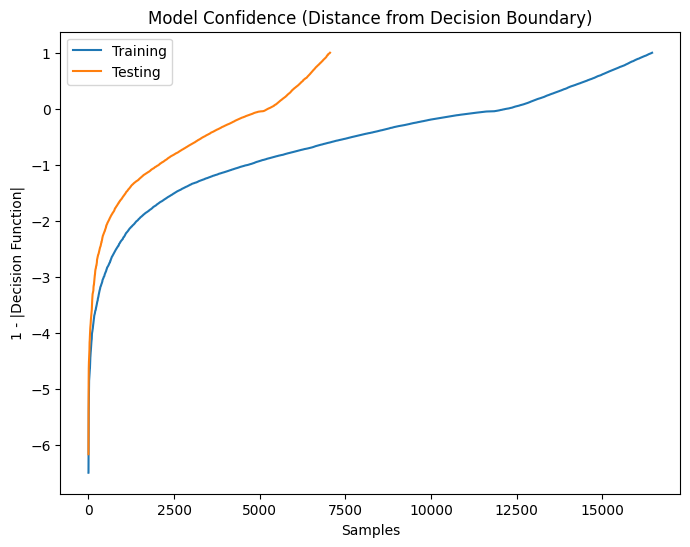

In [30]:
# Get decision function distances
train_dist = svm_model.decision_function(X_train)
test_dist = svm_model.decision_function(X_test)

# Convert to "loss" (distance from margin)
train_loss = 1 - np.abs(train_dist)
test_loss = 1 - np.abs(test_dist)

# Plot training and testing "loss"
plt.figure(figsize=(8, 6))
plt.plot(np.sort(train_loss), label='Training')
plt.plot(np.sort(test_loss), label='Testing')
plt.title('Model Confidence (Distance from Decision Boundary)')
plt.xlabel('Samples')
plt.ylabel('1 - |Decision Function|')
plt.legend()
plt.show()

# LSTM

# Ranking Based **Featured**

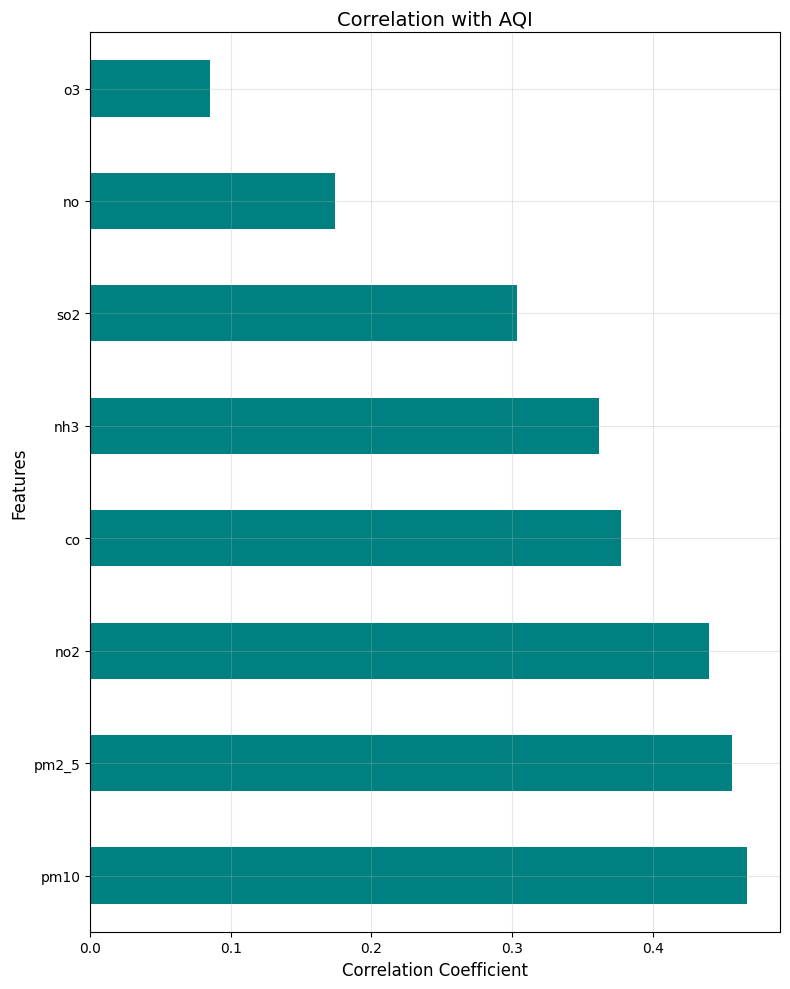

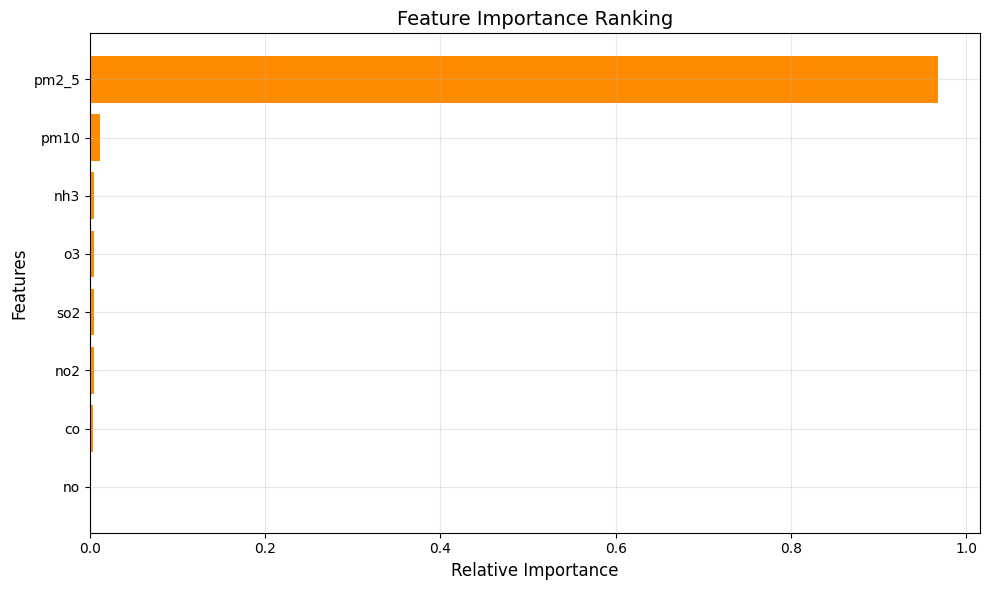

Feature Importance Ranking:
  Feature  Importance
5   pm2_5    0.967586
6    pm10    0.011097
7     nh3    0.004581
3      o3    0.004138
4     so2    0.004129
2     no2    0.003991
0      co    0.003587
1      no    0.000890


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

# Remove non-numeric columns (assuming they exist)
if 'city' in df_normalized.columns:
    df_normalized = df_normalized.drop('city', axis=1)
if 'date' in df_normalized.columns:
    df_normalized = df_normalized.drop('date', axis=1)

# Calculate correlation matrix with AQI
corr_matrix = df_normalized.corr()
aqi_correlation = corr_matrix['aqi'].sort_values(ascending=False)

# Plot correlation with AQI
plt.figure(figsize=(8, 10))
aqi_correlation.drop('aqi').plot(kind='barh', color='teal')
plt.title('Correlation with AQI', fontsize=14)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Feature importance using Random Forest
X = df_normalized.drop('aqi', axis=1)
y = df_normalized['aqi']

model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='darkorange')
plt.title('Feature Importance Ranking', fontsize=14)
plt.xlabel('Relative Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Feature Importance Ranking:")
print(feature_importance)

In [23]:
# Select top 3 most important features (excluding target)
important_features = feature_importance.head(5)['Feature'].tolist()

# Make sure aqi is included
if 'aqi' not in important_features:
    important_features.append('aqi')

# Create reduced dataset
df_reduced_pr = df_normalized[important_features].copy()

print("\nSelected Features:", important_features)
print("Reduced dataset shape:", df_reduced_pr.shape)
print("\nFirst 5 rows of reduced dataset:")
print(df_reduced_pr.head())

df_reduced_pr.to_csv('pr_reduced_data.csv', index=False)


Selected Features: ['pm2_5', 'pm10', 'nh3', 'o3', 'so2', 'aqi']
Reduced dataset shape: (23504, 6)

First 5 rows of reduced dataset:
      pm2_5      pm10       nh3        o3       so2  aqi
0  0.029713  0.029462  0.023708  0.320427  0.107366  1.0
1  0.054674  0.063392  0.077591  0.001797  0.048630  1.0
2  0.060357  0.070845  0.079746  0.000418  0.053468  1.0
3  0.068028  0.083000  0.103454  0.000000  0.080417  1.0
4  0.072758  0.084503  0.114940  0.000049  0.063167  1.0


# **SVM**

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Load the dataset
data = pd.read_csv('pr_reduced_data.csv')

# Convert AQI to binary classification (good/bad)
# Assuming: good (0) = AQI ≤ 100, bad (1) = AQI > 100
data['air_quality'] = np.where(data['aqi'] <= 0.5, 0, 1)  # Since normalized 0-1, 0.5 represents 100 AQI

# Features and target
X = data[['pm2_5', 'pm10', 'nh3', 'o3', 'so2']]
y = data['air_quality']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
# Initialize SVM classifier
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [40]:
# Predictions
y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1743  252]
 [ 159 4898]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1995
           1       0.95      0.97      0.96      5057

    accuracy                           0.94      7052
   macro avg       0.93      0.92      0.93      7052
weighted avg       0.94      0.94      0.94      7052



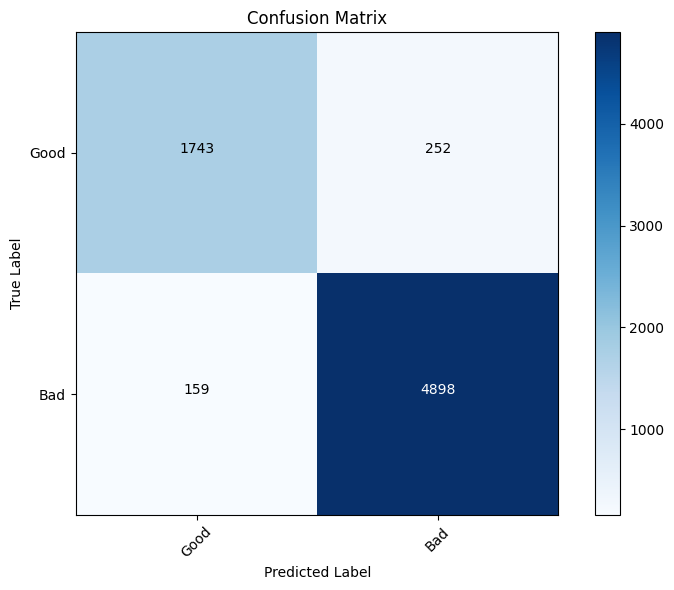

In [41]:
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Good', 'Bad'], rotation=45)
plt.yticks(tick_marks, ['Good', 'Bad'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

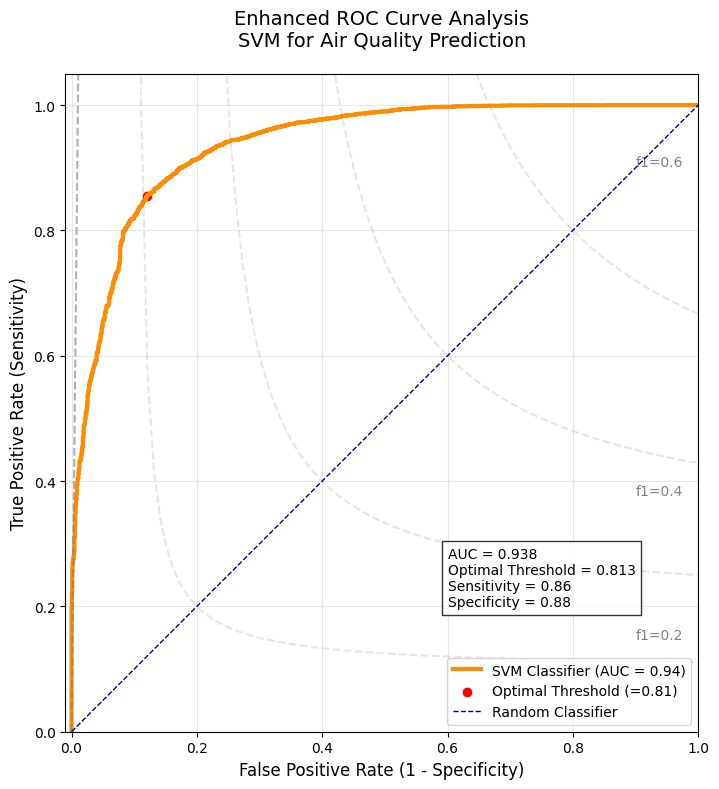

In [42]:
from sklearn.metrics import RocCurveDisplay

# Create enhanced ROC curve plot
plt.figure(figsize=(10, 8))

# Plot ROC curve with more details
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                             estimator_name='SVM Classifier')
roc_display.plot(ax=plt.gca(), color='darkorange', lw=3)

# Add important thresholds points
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red',
            label=f'Optimal Threshold (={optimal_threshold:.2f})')

# Add iso-f1 curves
x = np.linspace(0, 1, 100)
for f_score in [0.2, 0.4, 0.6, 0.8]:
    y = f_score * x / (2 * x - f_score)
    plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2, linestyle='--')
    plt.annotate(f'f1={f_score:.1f}', xy=(0.9, y[45] + 0.02), alpha=0.5)

# Add diagonal and decorate
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Random Classifier')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
plt.title('Enhanced ROC Curve Analysis\nSVM for Air Quality Prediction', fontsize=14, pad=20)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)

# Add performance metrics box
metrics_text = (f'AUC = {roc_auc:.3f}\n'
                f'Optimal Threshold = {optimal_threshold:.3f}\n'
                f'Sensitivity = {tpr[optimal_idx]:.2f}\n'
                f'Specificity = {1-fpr[optimal_idx]:.2f}')
plt.text(0.6, 0.2, metrics_text, bbox=dict(facecolor='white', alpha=0.8),
         fontsize=10)

plt.tight_layout()
plt.show()